In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Charged mass on a rod ###

An object of mass $m$ and charge $q$ is fixed to the end of a massless,
rigid rod of length $\ell$.  The other end of the rod is fixed to the
origin by a frictionless joint which allows the rod to rotate freely in
any direction.
A constant magnetic field, $\vec{B}=B_0\hat{z}$ threads the space, parallel
to the uniform gravitational field giving acceleration $-g\hat{z}$.
Define $\beta=qB_0/(2m)$ and $R^2(z)=\ell^2-z^2$.

The Hamilton equations of motion are
\begin{eqnarray}
  m\dot{z}         &=& p_z\ \frac{R^2}{\ell^2} \\
  mR^2\dot{\theta} &=& p_\theta - \beta mR^2   \\
  \dot{p_z}        &=& \frac{p_z^2 z}{m\ell^2} - mg
                    -  \frac{2[p_\theta-\beta mR^2]\beta m z}{mR^2}
                    -  \frac{[p_\theta-\beta mR^2]^2z}{mR^4} \\
  \dot{p_\theta}   &=& 0
\end{eqnarray}

Text(0, 0.5, '$\\theta/\\pi$')

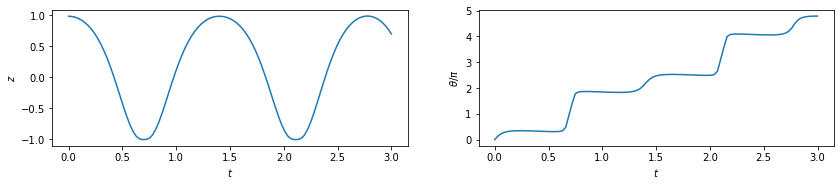

In [31]:
from scipy.integrate import solve_ivp

# Set up some constants for our system.
mm   = 1.0
gg   = 10.
beta = 1.0
ell  = 1.0
ell2 = ell**2

def derivs(t,y):
    """The derivatives for the ODE integration."""
    # Order our variables as [z,theta,p_z,p_theta] and return the derivatives in this order.
    # Just to make bookkeeping easier we'll pass p_theta and return a zero derivative for it.
    zz    = y[0]
    tt    = y[1]
    pz    = y[2]
    pt    = y[3]
    R2    = np.max([ell2 - zz**2,1e-2])
    rho   = pt - beta*mm*R2
    dy    = np.zeros_like(y)
    dy[0] = pz * R2/ell2
    dy[1] = (pt-beta*mm*R2)/(mm*R2)
    dy[2] = pz**2*zz/mm/ell2 - mm*gg - 2*rho*beta*zz/R2 - rho**2*zz/mm/R2**2
    dy[3] = 0.0
    return(dy)
    #
# Need a bit of angular momentum to stop R^2 getting small,
# which causes real problems.  Can probably rewrite these
# equations to get better numerical stability.
tobs = np.linspace(0.,3.,101)
y0   = np.array([ell*np.cos(10*np.pi/180),0.0,0.0,0.5])
res  = solve_ivp(derivs,[tobs[0],tobs[-1]],y0,t_eval=tobs)
tobs = res.t
res  = res.y
#
zz   = res[0,:]
tt   = res[1,:]
pz   = res[2,:]
pt   = res[3,:]
# and make a series of plots
fig,ax = plt.subplots(1,2,figsize=(14,2.5))
ax[0].plot(tobs,zz)
ax[1].plot(tobs,tt/np.pi)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$z$')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$\theta/\pi$')